In [2]:
#import necessary libraries
import os
import zipfile
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

In [2]:
# Path to the ZIP file
zip_file = 'folders.zip'

In [3]:
# Extract the contents of the ZIP file to a temporary directory
temp_dir = 'temp'
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(temp_dir)

In [3]:
path1 = 'temp/folders/folder1'
path2 = 'temp/folders/folder2'
path3 = 'temp/folders/folder3'
path4 = 'temp/folders/folder4'
path5 = 'temp/folders/folder5'
row1 = []
row2 = []
row3 = []
row4 = []
row5 = []

In [13]:
def load_data(in_path, out_list):
    for image in glob.glob(os.path.join(in_path, '*')):
        im = mpimg.imread(image)
        if not im is None:
            out_list.append(im)

    plt.imshow(out_list[0]);

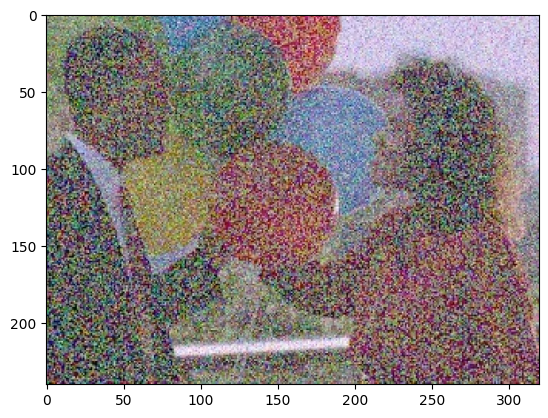

In [20]:
# load first folder
load_data(path1, row1)

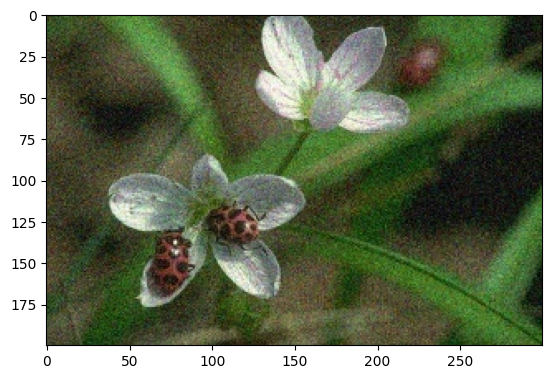

In [21]:
# load Second folder
load_data(path2, row2)

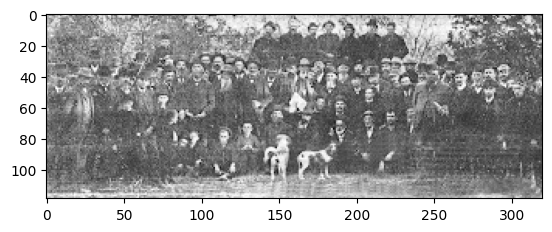

In [22]:
# load 3ed folder
load_data(path3, row3)

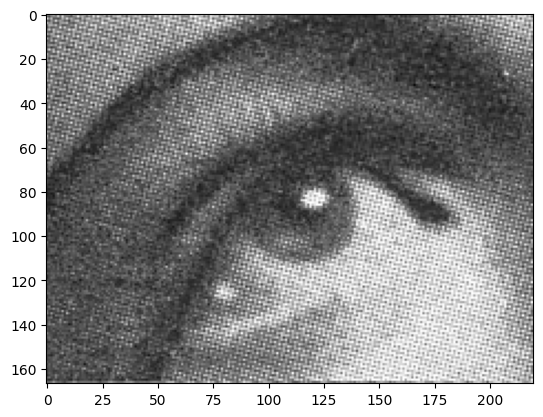

In [23]:
# load 4th folder
load_data(path4, row4)

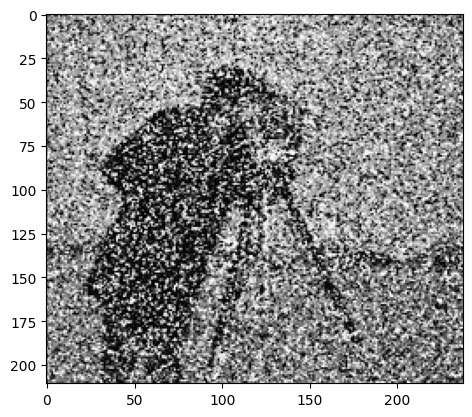

In [24]:
# load 5th folder
load_data(path5, row5)

In [7]:
row_all = [row1,row2,row3,row4,row5]
path_all = [path1,path2,path3,path4,path5]

output_folder = os.path.join('temp/folders', 'output')
os.makedirs(output_folder, exist_ok=True)

In [8]:
for path in path_all:

    for image in glob.glob(os.path.join(path, '*')):
        i = mpimg.imread(image)
        bgr = cv2.cvtColor(i, cv2.COLOR_RGB2BGR)
        cv2.imshow('original', bgr)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

        print('Which blurring method do you prefer for the image shown previously? ')
        blur_method= int(input('Enter 1 for Blur method  and 2 for MedianBlur method and 3 for GaussianBlur method and 4 for Bilateral method'))

        if  blur_method == 1 :
          blurred_image= cv2.blur(image, ksize = (5,5))
        elif  blur_method == 2 :
          blurred_image= cv2.medianBlur(image, 5)
        elif  blur_method == 3 :
          blurred_image= cv2.GaussianBlur(image, ksize = (5,5), sigmaX = 0)
        elif  blur_method == 4 : 
          blurred_image= cv2.bilateralFilter(image, 5, sigmaSpace = 75, sigmaColor =75)

        #display blurred image before saving 
        cv2.imshow('blurred image', blurred_image )
        cv2.waitKey(0)
        cv2.destroyAllWindows()

         # Save the blurred image
        output_file = os.path.join(output_folder, os.path.basename(image_file))
        cv2.imwrite(output_file, blurred_image)

        
        

Which blurring method do you prefer for the image shown previously? 


Enter 1 for Blur method  and 2 for MedianBlur method and 3 for GaussianBlur method and 4 for Bilateral method 1


error: OpenCV(4.8.1) :-1: error: (-5:Bad argument) in function 'blur'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'
